<a href="https://colab.research.google.com/github/miftahkulo/python-image-processing-vgg19/blob/main/Fish_Classification_VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, Layer, InputSpec, Conv2D, MaxPooling2D, Activation, BatchNormalization
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.utils.vis_utils import plot_model
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/Shareddrives/FishClassification/

/content/drive/Shareddrives/FishClassification


#IMAGE ANALYZING

In [ ]:
# define global variable
IMAGE_DIR = "images2/"

# 1. Image Information Analysis

In [ ]:
x_data = [] 
y_data = []
list_width, list_height = [],[]

In [ ]:
for category in glob(IMAGE_DIR+'/*'):
    for file in tqdm(glob(category+'/*.jpg')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array) 
        y_data.append(category.split("/")[-1])
        h, w, _ = img_array.shape
        list_width.append(w)
        list_height.append(h)
        
data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 150/150 [00:03<00:00, 48.43it/s] 
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


##deleting not jpg file

In [ ]:
#checking jpg file
for category in glob(IMAGE_DIR+'/*'):
    for file in tqdm(glob(category+'/*.png')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [ ]:
#remove png file
for category in glob(IMAGE_DIR+'/*'):
    for file in glob(category+'/*.png'):
        os.remove(file)

In [ ]:
#rechecking jfif file
for category in glob(IMAGE_DIR+'/*'):
    for file in tqdm(glob(category+'/*.png')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


## check shape & dimension

In [ ]:
data.shape

(456, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'pseudanthias_lori': 150,
         'pseudanthias_randalli': 156,
         'pseudanthias_smithvanizi': 150})

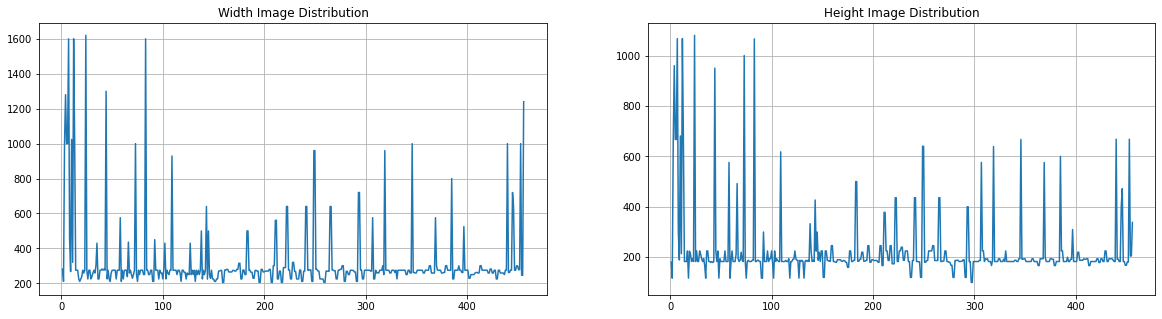

In [ ]:
# overview dimension of images
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

ax[0].plot(np.arange(1, len(list_width) + 1), list_width)
ax[0].set_title("Width Image Distribution")
ax[0].grid(True)

ax[1].plot(np.arange(1, len(list_height) + 1), list_height)
ax[1].set_title("Height Image Distribution")
ax[1].grid(True)

plt.show()

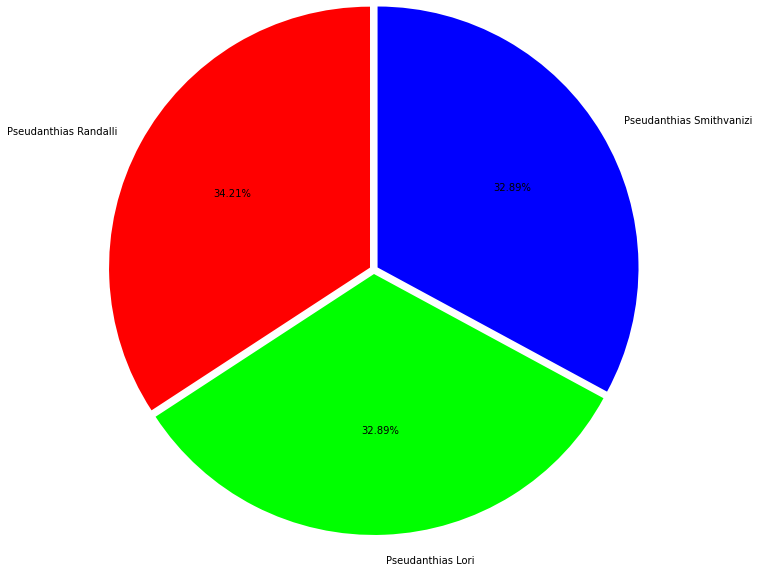

In [ ]:
colors = ['#FF0000','#00FF00','#0000FF']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05,0.05],autopct='%0.2f%%',
        labels=['Pseudanthias Randalli', 'Pseudanthias Lori', 'Pseudanthias Smithvanizi'], colors= colors,radius=3)
plt.show()

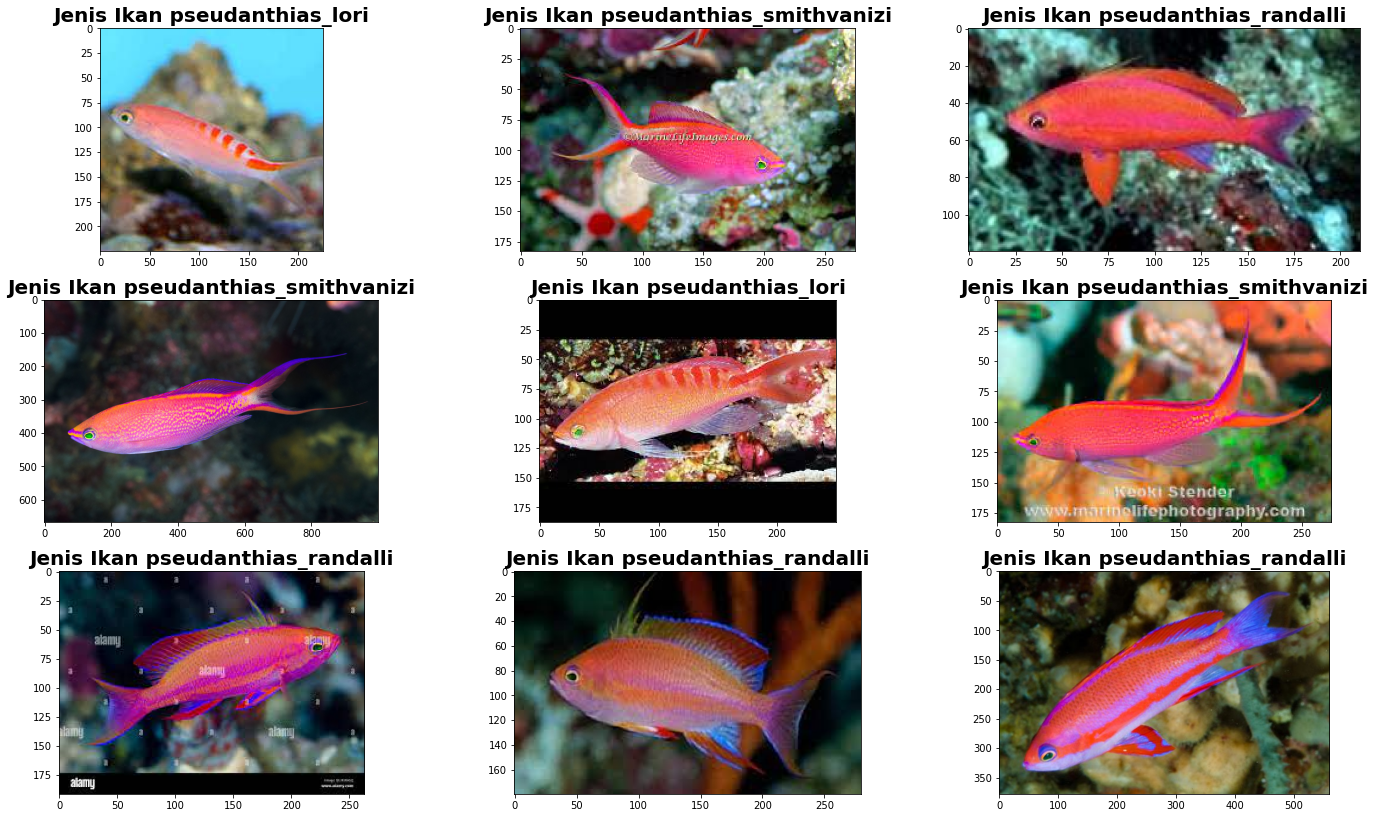

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(474)
    plt.title('Jenis Ikan {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
className = glob(IMAGE_DIR + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  3


#Splitting Image

In [ ]:
import shutil
import argparse
import random

In [ ]:
root_dir = IMAGE_DIR
classes_dir = ['pseudanthias_lori', 'pseudanthias_randalli','pseudanthias_smithvanizi']

In [ ]:
train_ratio = 0.85
val_ratio = 0.10

In [ ]:
for cls in classes_dir:
    os.makedirs(root_dir +'train/' + cls, exist_ok=True)
    os.makedirs(root_dir +'test/' + cls, exist_ok=True)
    os.makedirs(root_dir +'val/' + cls, exist_ok=True)
    
    # for each class, let's counts its elements
    src = root_dir + cls
    allFileNames = os.listdir(src)

    # shuffle it and split into train/test/va
    np.random.shuffle(allFileNames)
    train_FileNames, test_FileNames, val_FileNames = np.split(np.array(allFileNames),[int(train_ratio * len(allFileNames)), int((1-val_ratio) * len(allFileNames))])
    
    # save their initial path
    train_FileNames = [src+'/'+ name  for name in train_FileNames.tolist()]
    test_FileNames  = [src+'/' + name for name in test_FileNames.tolist()]
    val_FileNames   = [src+'/' + name for name in val_FileNames.tolist()]
    print("\n *****************************",
          "\n Total images: ",cls, len(allFileNames),
          '\n Training: ', len(train_FileNames),
          '\n Testing: ', len(test_FileNames),
          '\n Validation: ', len(val_FileNames),
          '\n *****************************')
        # copy files from the initial path to the final folders
    for name in train_FileNames:
      shutil.copy(name, root_dir +'train/' + cls)
    for name in test_FileNames:
      shutil.copy(name, root_dir +'test/' + cls)
    for name in val_FileNames:
      shutil.copy(name, root_dir +'val/' + cls)


 ***************************** 
 Total images:  pseudanthias_lori 150 
 Training:  127 
 Testing:  8 
 Validation:  15 
 *****************************

 ***************************** 
 Total images:  pseudanthias_randalli 156 
 Training:  132 
 Testing:  8 
 Validation:  16 
 *****************************

 ***************************** 
 Total images:  pseudanthias_smithvanizi 150 
 Training:  127 
 Testing:  8 
 Validation:  15 
 *****************************


In [ ]:
# checking
paths = ['train/', 'test/','val/']
for p in paths:
  for dir,subdir,files in os.walk(root_dir + p):
    print(dir,' ', p, str(len(files)))

images2/train/   train/ 0
images2/train/pseudanthias_lori   train/ 127
images2/train/pseudanthias_randalli   train/ 132
images2/train/pseudanthias_smithvanizi   train/ 127
images2/test/   test/ 0
images2/test/pseudanthias_lori   test/ 8
images2/test/pseudanthias_randalli   test/ 8
images2/test/pseudanthias_smithvanizi   test/ 8
images2/val/   val/ 0
images2/val/pseudanthias_lori   val/ 15
images2/val/pseudanthias_randalli   val/ 16
images2/val/pseudanthias_smithvanizi   val/ 15


#Create Model

In [ ]:
vgg = VGG19(input_shape=(224,224,3), weights='imagenet', pooling="max", include_top=False)
#do not train the pre-trained layers of VGG-19
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(64, activation='relu', name='FC_1')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

#adding output layer.Softmax classifier is used as it is multi-class classification
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)

model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "adam",
              metrics = ["accuracy"])

batch_size = 256

80134624/80134624 [==============================] - 5s 0us/step


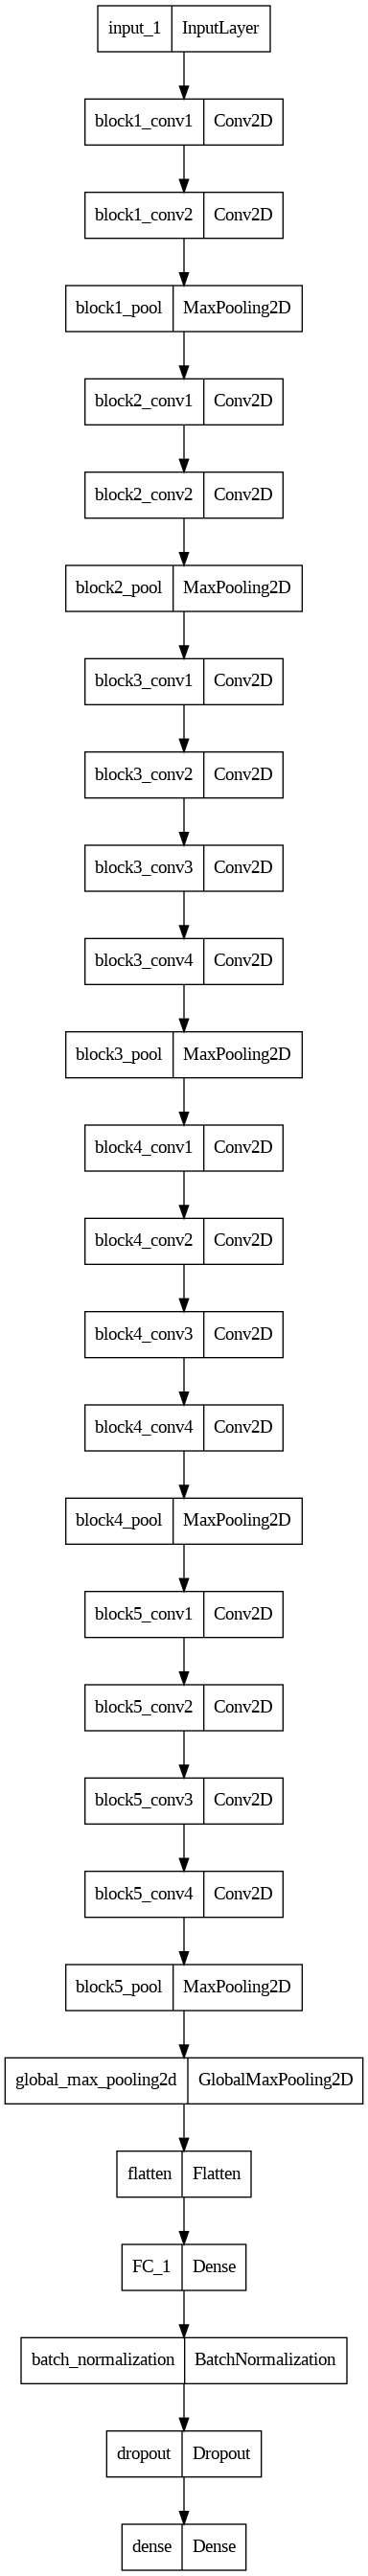

In [ ]:
plot_model(model)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
train_path = "images2/train/"
test_path = "images2/test/"
val_path = "images2/val/"

In [ ]:
#RESIZING IMAGE

x_train=[]

for folder in os.listdir(train_path):

    sub_path=train_path+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        ext = os.path.splitext(image_path)[-1].lower()

        if(ext == ".jpg" or ext == ".jpeg"):

            img_arr=cv2.imread(image_path)

            img_arr=cv2.resize(img_arr,(224,224))

            x_train.append(img_arr)

x_test=[]

for folder in os.listdir(test_path):

    sub_path=test_path+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        ext = os.path.splitext(image_path)[-1].lower()

        if(ext == ".jpg" or ext == ".jpeg"):

            img_arr=cv2.imread(image_path)

            img_arr=cv2.resize(img_arr,(224,224))

            x_test.append(img_arr)

x_val=[]

for folder in os.listdir(val_path):

    sub_path=val_path+folder

    for img in os.listdir(sub_path):

        image_path=sub_path+"/"+img

        ext = os.path.splitext(image_path)[-1].lower()

        if(ext == ".jpg" or ext == ".jpeg"):

            img_arr=cv2.imread(image_path)

            img_arr=cv2.resize(img_arr,(224,224))

            x_val.append(img_arr)

In [ ]:
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

In [ ]:
train_x=train_x/255.0
test_x=test_x/255.0
val_x=val_x/255.0

In [ ]:
#RESCALING IMAGE
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

val_generator = val_datagen.flow_from_directory(
        val_path, 
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 386 images belonging to 3 classes.
Found 24 images belonging to 3 classes.
Found 46 images belonging to 3 classes.


In [ ]:
train_y=train_generator.classes
test_y=test_generator.classes
val_y=val_generator.classes
train_generator.class_indices

{'pseudanthias_lori': 0,
 'pseudanthias_randalli': 1,
 'pseudanthias_smithvanizi': 2}

#TRAINING PROCESS

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)
#Early stopping to avoid overfitting of model

In [ ]:
# fit the model
history = model.fit(
  train_x,
  train_y,
  validation_data=(val_x,val_y),
  batch_size=batch_size,
  callbacks=[early_stop],
  epochs=35,shuffle=True)

Epoch 1/35
2/2 [==============================] - 52s 17s/step - loss: 1.4457 - accuracy: 0.3990 - val_loss: 1.0068 - val_accuracy: 0.4783
Epoch 2/35
2/2 [==============================] - 3s 1s/step - loss: 0.9239 - accuracy: 0.6036 - val_loss: 0.9631 - val_accuracy: 0.4783
Epoch 3/35
2/2 [==============================] - 3s 1s/step - loss: 0.7046 - accuracy: 0.6813 - val_loss: 0.9332 - val_accuracy: 0.4565
Epoch 4/35
2/2 [==============================] - 3s 1s/step - loss: 0.5461 - accuracy: 0.7720 - val_loss: 0.9183 - val_accuracy: 0.6087
Epoch 5/35
2/2 [==============================] - 3s 1s/step - loss: 0.4658 - accuracy: 0.8212 - val_loss: 0.8910 - val_accuracy: 0.6522
Epoch 6/35
2/2 [==============================] - 3s 1s/step - loss: 0.3922 - accuracy: 0.8679 - val_loss: 0.8435 - val_accuracy: 0.6739
Epoch 7/35
2/2 [==============================] - 3s 1s/step - loss: 0.3268 - accuracy: 0.9145 - val_loss: 0.7942 - val_accuracy: 0.7174
Epoch 8/35
2/2 [=======================

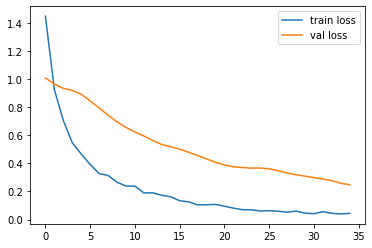

In [ ]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(test_x,test_y,batch_size=batch_size)

1/1 [==============================] - 3s 3s/step - loss: 0.1382 - accuracy: 1.0000


[0.13818040490150452, 1.0]

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [ ]:
#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

1/1 [==============================] - 0s 178ms/step


In [ ]:
#get classification report
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



In [ ]:
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

[[8 0 0]
 [0 8 0]
 [0 0 8]]


In [ ]:
model.save('fishClassModel9')

#TESTING WITH IMAGE FROM TEST

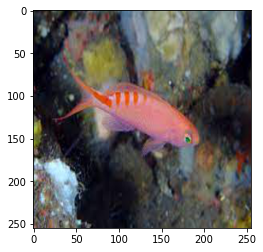

1/1 [==============================] - 1s 682ms/step
Path :pseudanthias_lori
Unknown


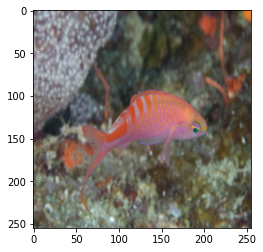

1/1 [==============================] - 0s 25ms/step
Path :pseudanthias_lori
Unknown


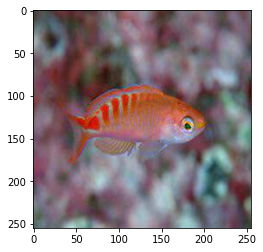

1/1 [==============================] - 0s 23ms/step
Path :pseudanthias_lori
0.79
pseudanthias_lori


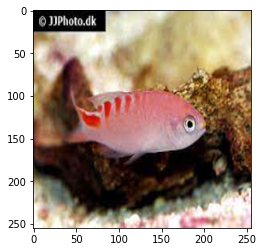

1/1 [==============================] - 0s 17ms/step
Path :pseudanthias_lori
0.80
pseudanthias_lori


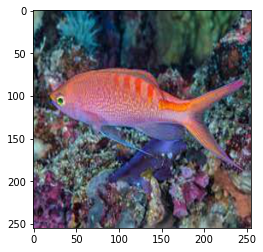

1/1 [==============================] - 0s 18ms/step
Path :pseudanthias_lori
Unknown


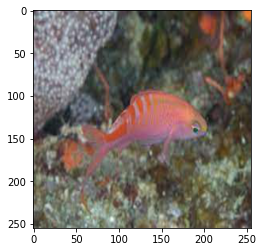

1/1 [==============================] - 0s 18ms/step
Path :pseudanthias_lori
Unknown


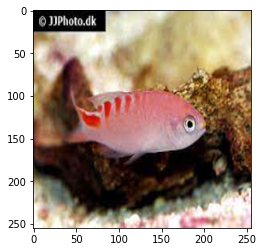

1/1 [==============================] - 0s 19ms/step
Path :pseudanthias_lori
0.80
pseudanthias_lori


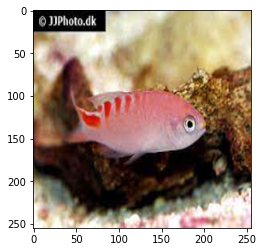

1/1 [==============================] - 0s 16ms/step
Path :pseudanthias_lori
0.80
pseudanthias_lori


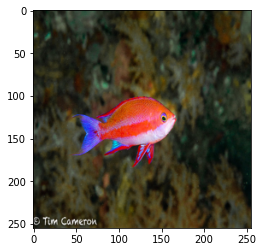

1/1 [==============================] - 0s 23ms/step
Path :pseudanthias_randalli
0.75
pseudanthias_smithvanizi


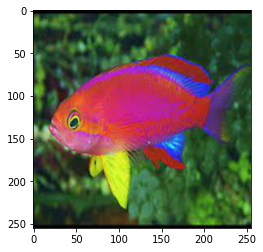

1/1 [==============================] - 0s 23ms/step
Path :pseudanthias_randalli
0.66
pseudanthias_randalli


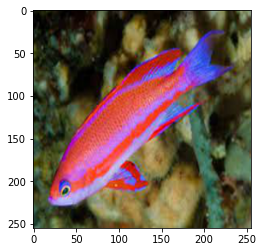

1/1 [==============================] - 0s 24ms/step
Path :pseudanthias_randalli
Unknown


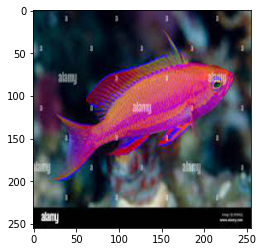

1/1 [==============================] - 0s 23ms/step
Path :pseudanthias_randalli
Unknown


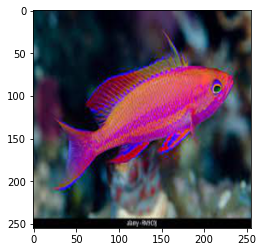

1/1 [==============================] - 0s 23ms/step
Path :pseudanthias_randalli
Unknown


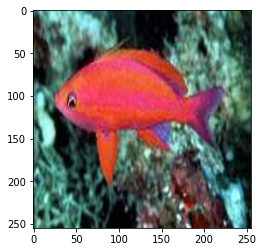

1/1 [==============================] - 0s 19ms/step
Path :pseudanthias_randalli
0.64
pseudanthias_randalli


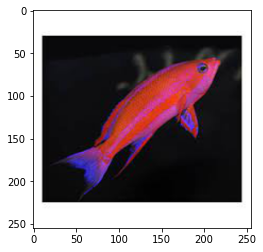

1/1 [==============================] - 0s 33ms/step
Path :pseudanthias_randalli
Unknown


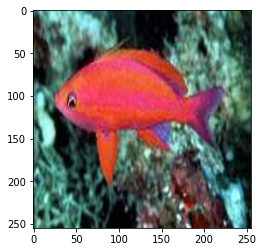

1/1 [==============================] - 0s 46ms/step
Path :pseudanthias_randalli
0.64
pseudanthias_randalli


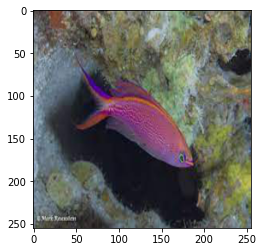

1/1 [==============================] - 0s 25ms/step
Path :pseudanthias_smithvanizi
0.82
pseudanthias_smithvanizi


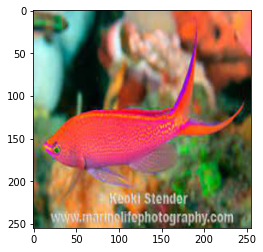

1/1 [==============================] - 0s 22ms/step
Path :pseudanthias_smithvanizi
0.96
pseudanthias_smithvanizi


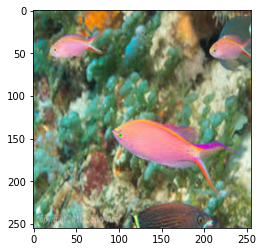

1/1 [==============================] - 0s 22ms/step
Path :pseudanthias_smithvanizi
0.93
pseudanthias_smithvanizi


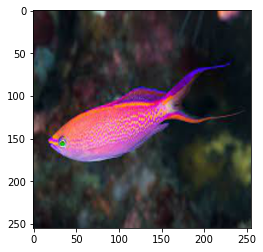

1/1 [==============================] - 0s 39ms/step
Path :pseudanthias_smithvanizi
0.93
pseudanthias_smithvanizi


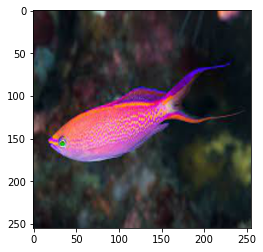

1/1 [==============================] - 0s 62ms/step
Path :pseudanthias_smithvanizi
0.93
pseudanthias_smithvanizi


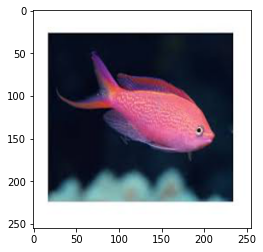

1/1 [==============================] - 0s 53ms/step
Path :pseudanthias_smithvanizi
0.84
pseudanthias_smithvanizi


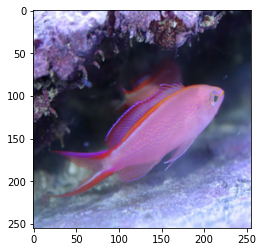

1/1 [==============================] - 0s 36ms/step
Path :pseudanthias_smithvanizi
0.80
pseudanthias_smithvanizi


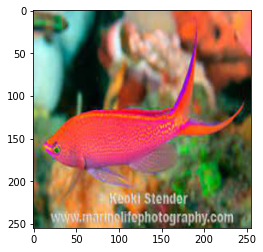

1/1 [==============================] - 0s 23ms/step
Path :pseudanthias_smithvanizi
0.96
pseudanthias_smithvanizi


In [ ]:
from PIL import Image

for im in os.listdir(IMAGE_DIR+"test/"):
    for im2 in os.listdir(IMAGE_DIR+"test/"+im):
        img = Image.open(IMAGE_DIR+"test/"+im+"/"+im2)
        img = img.resize((255,255))
        plt.imshow(img)
        plt.show()
        x=np.array(img)
        x=np.expand_dims(x,axis=0)
        images=np.vstack([x])
        pred=model.predict(images/255, batch_size=batch_size, verbose=1) 
        print("Path :"+im)
        if pred[0][0] > 0.6:
            print("{:.2f}".format(pred[0][0]))
            print("pseudanthias_lori")
        elif pred[0][1] > 0.6:
            print("{:.2f}".format(pred[0][1]))
            print("pseudanthias_randalli")
        elif pred[0][2] > 0.6:
            print("{:.2f}".format(pred[0][2]))
            print("pseudanthias_smithvanizi")
        else:
            print("Unknown")

#LOAD MODEL TEST

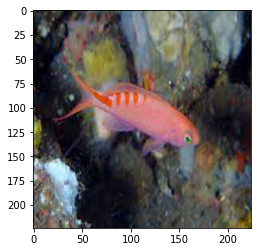

1/1 [==============================] - 1s 809ms/step
Path :pseudanthias_lori
Unknown


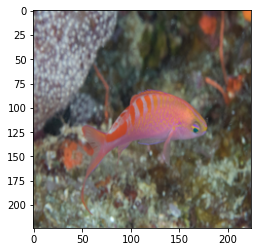

1/1 [==============================] - 0s 15ms/step
Path :pseudanthias_lori
Unknown


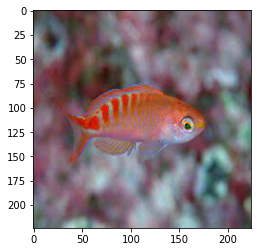

1/1 [==============================] - 0s 18ms/step
Path :pseudanthias_lori
0.93
pseudanthias_lori


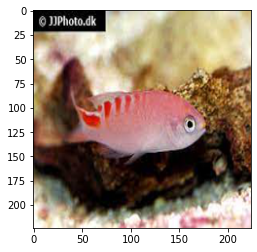

1/1 [==============================] - 0s 15ms/step
Path :pseudanthias_lori
0.82
pseudanthias_lori


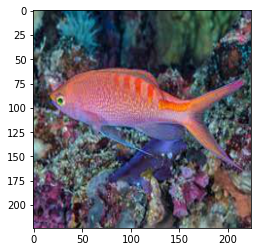

1/1 [==============================] - 0s 37ms/step
Path :pseudanthias_lori
Unknown


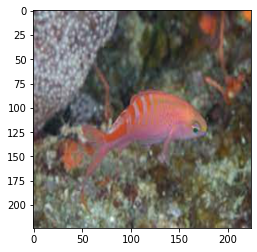

1/1 [==============================] - 0s 33ms/step
Path :pseudanthias_lori
Unknown


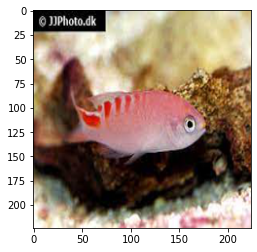

1/1 [==============================] - 0s 41ms/step
Path :pseudanthias_lori
0.82
pseudanthias_lori


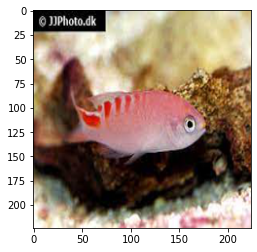

1/1 [==============================] - 0s 32ms/step
Path :pseudanthias_lori
0.82
pseudanthias_lori


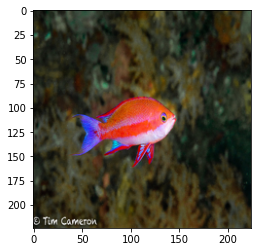

1/1 [==============================] - 0s 20ms/step
Path :pseudanthias_randalli
0.69
pseudanthias_smithvanizi


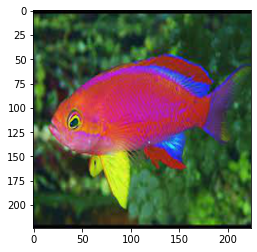

1/1 [==============================] - 0s 19ms/step
Path :pseudanthias_randalli
0.78
pseudanthias_randalli


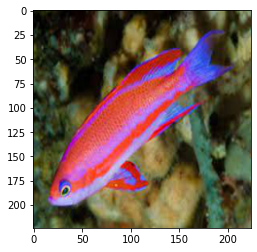

1/1 [==============================] - 0s 19ms/step
Path :pseudanthias_randalli
Unknown


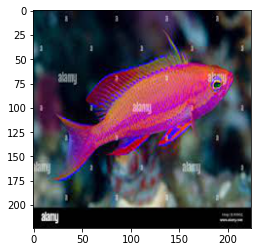

1/1 [==============================] - 0s 19ms/step
Path :pseudanthias_randalli
0.71
pseudanthias_randalli


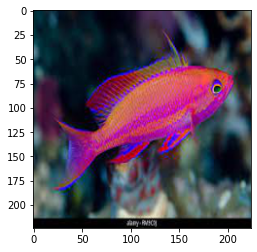

1/1 [==============================] - 0s 24ms/step
Path :pseudanthias_randalli
0.79
pseudanthias_randalli


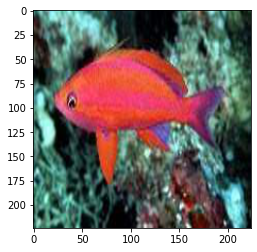

1/1 [==============================] - 0s 21ms/step
Path :pseudanthias_randalli
0.72
pseudanthias_randalli


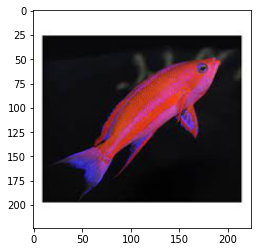

1/1 [==============================] - 0s 24ms/step
Path :pseudanthias_randalli
Unknown


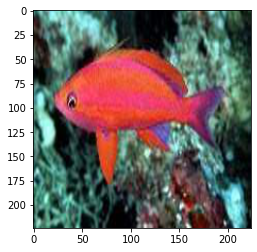

1/1 [==============================] - 0s 23ms/step
Path :pseudanthias_randalli
0.72
pseudanthias_randalli


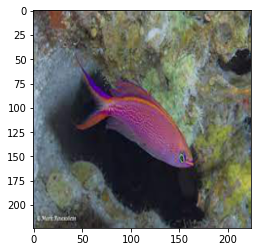

1/1 [==============================] - 0s 32ms/step
Path :pseudanthias_smithvanizi
0.76
pseudanthias_smithvanizi


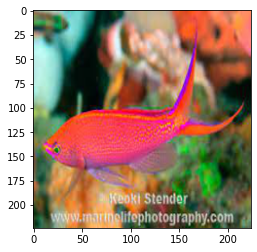

1/1 [==============================] - 0s 25ms/step
Path :pseudanthias_smithvanizi
0.95
pseudanthias_smithvanizi


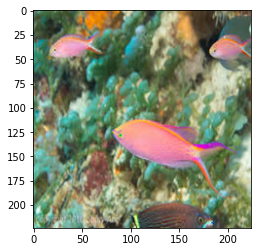

1/1 [==============================] - 0s 26ms/step
Path :pseudanthias_smithvanizi
0.94
pseudanthias_smithvanizi


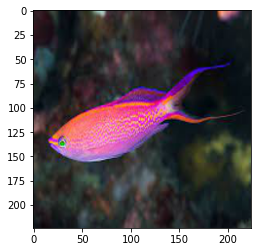

1/1 [==============================] - 0s 39ms/step
Path :pseudanthias_smithvanizi
0.94
pseudanthias_smithvanizi


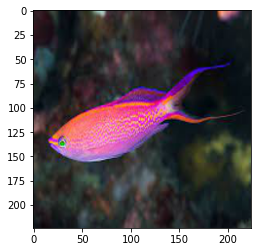

1/1 [==============================] - 0s 28ms/step
Path :pseudanthias_smithvanizi
0.94
pseudanthias_smithvanizi


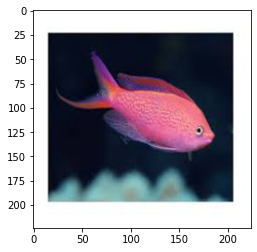

1/1 [==============================] - 0s 29ms/step
Path :pseudanthias_smithvanizi
0.92
pseudanthias_smithvanizi


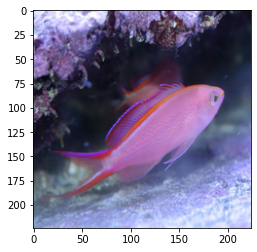

1/1 [==============================] - 0s 27ms/step
Path :pseudanthias_smithvanizi
0.77
pseudanthias_smithvanizi


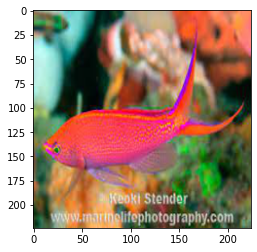

1/1 [==============================] - 0s 51ms/step
Path :pseudanthias_smithvanizi
0.95
pseudanthias_smithvanizi


In [ ]:
import tensorflow as tf
from PIL import Image
model = tf.keras.models.load_model('fishClassModel9')
batch_size = 256

for im in os.listdir(IMAGE_DIR+"test/"):
    for im2 in os.listdir(IMAGE_DIR+"test/"+im):
        img = Image.open(IMAGE_DIR+"test/"+im+"/"+im2)
        img = img.resize((224,224))
        plt.imshow(img)
        plt.show()
        x=np.array(img)
        x=np.expand_dims(x,axis=0)
        images=np.vstack([x])
        pred=model.predict(images/255, batch_size=batch_size, verbose=1) 
        print("Path :"+im)
        if pred[0][0] > 0.68:
            print("{:.2f}".format(pred[0][0]))
            print("pseudanthias_lori")
        elif pred[0][1] > 0.68:
            print("{:.2f}".format(pred[0][1]))
            print("pseudanthias_randalli")
        elif pred[0][2] > 0.68:
            print("{:.2f}".format(pred[0][2]))
            print("pseudanthias_smithvanizi")
        else:
            print("Unknown")

#TESTING FROM RANDOM IMAGE UPLOAD

In [ ]:
import shutil
from google.colab import files
uploaded = files.upload()
filename = next(iter(uploaded))
print(filename)

shutil.move(filename, "randomTest/"+filename)

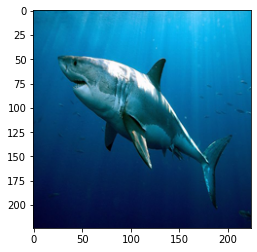

1/1 [==============================] - 0s 141ms/step
Path :hiu.jpg
Unknown


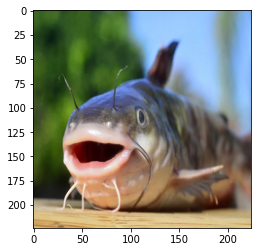

1/1 [==============================] - 0s 15ms/step
Path :lele.jpg
Unknown


In [ ]:
import tensorflow as tf
from PIL import Image
model = tf.keras.models.load_model('fishClassModel9')
batch_size = 256

for im in os.listdir("randomTest/"):
      img = Image.open("randomTest/"+im)
      img = img.resize((224,224))
      plt.imshow(img)
      plt.show()
      x=np.array(img)
      x=np.expand_dims(x,axis=0)
      images=np.vstack([x])
      pred=model.predict(images/255, batch_size=batch_size, verbose=1) 
      print("Path :"+im)
      if pred[0][0] > 0.9:
          print("{:.2f}".format(pred[0][0]))
          print("pseudanthias_lori")
      elif pred[0][1] > 0.9:
          print("{:.2f}".format(pred[0][1]))
          print("pseudanthias_randalli")
      elif pred[0][2] > 0.9:
          print("{:.2f}".format(pred[0][2]))
          print("pseudanthias_smithvanizi")
      else:
          print("Unknown")